In [21]:
import requests
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns

### Overview

#### HSG

In [22]:
# Read the CSV file
hsg = pd.read_csv(r'C:\Documents\PTTK\Project\HSG Historical Data.csv')

hsg = hsg.sort_index(ascending=False)
hsg = hsg.reset_index(drop=True)
hsg['Date'] = pd.to_datetime(hsg['Date'])
hsg.set_index('Date', inplace=True)

# Modify data
# Remove the '%' sign and convert to float
hsg['Change %'] = hsg['Change %'].replace('%', '', regex=True).astype(float)

# Convert the percentage values to decimals (divide by 100)
hsg['Change %'] = hsg['Change %'] / 100

# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    hsg[col] = hsg[col].str.replace(',', '').astype(float)

missing_values = hsg.isnull().sum()
hsg = hsg.dropna()

# Function to convert 'K' values to integers
def convert_volume(value):
    if pd.isnull(value):
        return np.nan  # Handle missing values
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'B' in value:
        return float(value.replace('B', '')) * 1000000000
    else:
        return float(value)

# Apply the function to the "Volume" column
hsg['Vol.'] = hsg['Vol.'].apply(convert_volume)

# Display the cleaned DataFrame
hsg



,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-02,5909.1,5598.8,5909.1,5591.6,4550000.0,0.0487
2020-01-03,5757.6,5916.3,5923.5,5743.1,4200000.0,-0.0256
2020-01-06,5786.4,5772.0,5880.2,5692.6,6590000.0,0.0050
2020-01-07,5721.5,5786.4,5858.6,5714.3,3200000.0,-0.0112
2020-01-08,5678.2,5663.8,5735.9,5591.6,5050000.0,-0.0076
...,...,...,...,...,...,...
2024-10-28,20750.0,20650.0,20900.0,20500.0,6510000.0,0.0222
2024-10-29,20700.0,20900.0,20900.0,20600.0,5120000.0,-0.0024
2024-10-30,20350.0,20700.0,20750.0,20300.0,5430000.0,-0.0169


In [23]:
hsg.describe()

,Price,Open,High,Low,Vol.,Change %
count,1207.000000,1207.000000,1207.000000,1207.000000,1.207000e+03,1207.000000
mean,19056.569843,19078.309528,19451.815327,18718.237780,1.275624e+07,0.001566
std,8558.418366,8586.476531,8707.452217,8446.503241,5.922639e+06,0.031350
min,3282.800000,3246.800000,3463.200000,3145.700000,2.100000e+06,-0.082900
25%,13366.600000,13330.400000,13636.400000,13018.750000,8.430000e+06,-0.015500
50%,18512.800000,18525.400000,19000.000000,18123.100000,1.186000e+07,0.000000
75%,22850.000000,22878.800000,23169.850000,22526.750000,1.583500e+07,0.018400
max,41541.700000,41750.000000,42750.000000,41333.300000,4.365000e+07,0.070000


##### Price and volume

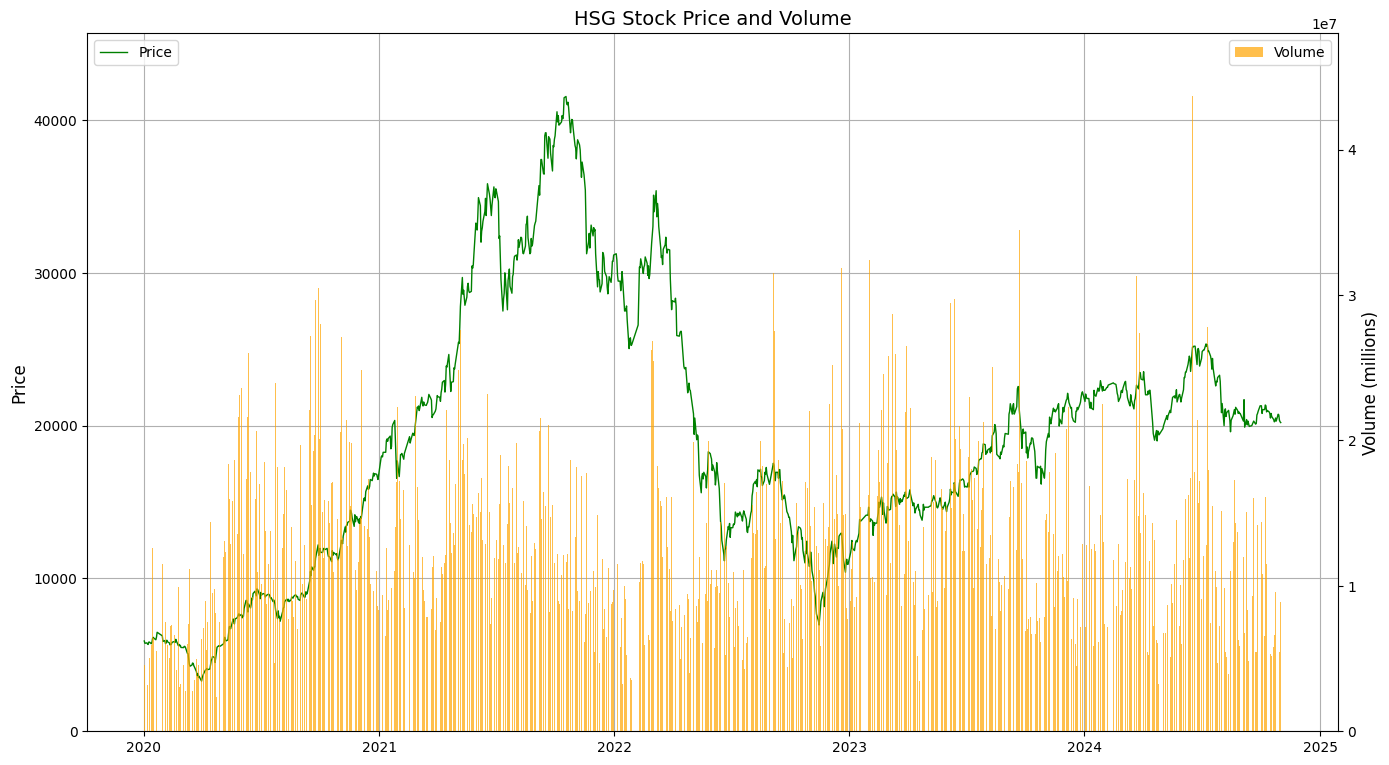

In [ ]:
# Create a figure with two axes, sharing the x-axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting the price on ax1
ax1.plot(hsg.index, hsg['Price'], color='green', label='Price', linewidth=1)
ax1.set_ylabel('Price', fontsize=12)
ax1.set_ylim(0, hsg['Price'].max() * 1.1)  # Adjust as needed for padding
ax1.set_title("HSG Stock Price and Volume", fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(visible=True)

# Creating a secondary axis for volume, below the price plot
ax2 = ax1.twinx()
ax2.set_frame_on(False)  # Remove the frame around volume plot
ax2.set_position([0.125, 0.05, 0.775, 0.2])  # Adjust position for volume bar
ax2.bar(hsg.index, hsg['Vol.'], color='orange', alpha=0.7, label='Volume')
ax2.set_ylim(0, hsg['Vol.'].max() * 1.1)  # Adjust as needed for padding
ax2.set_ylabel('Volume (millions)', fontsize=12)
ax2.legend(loc='upper right')

# Format x-axis for dates
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### MA for stock and volume

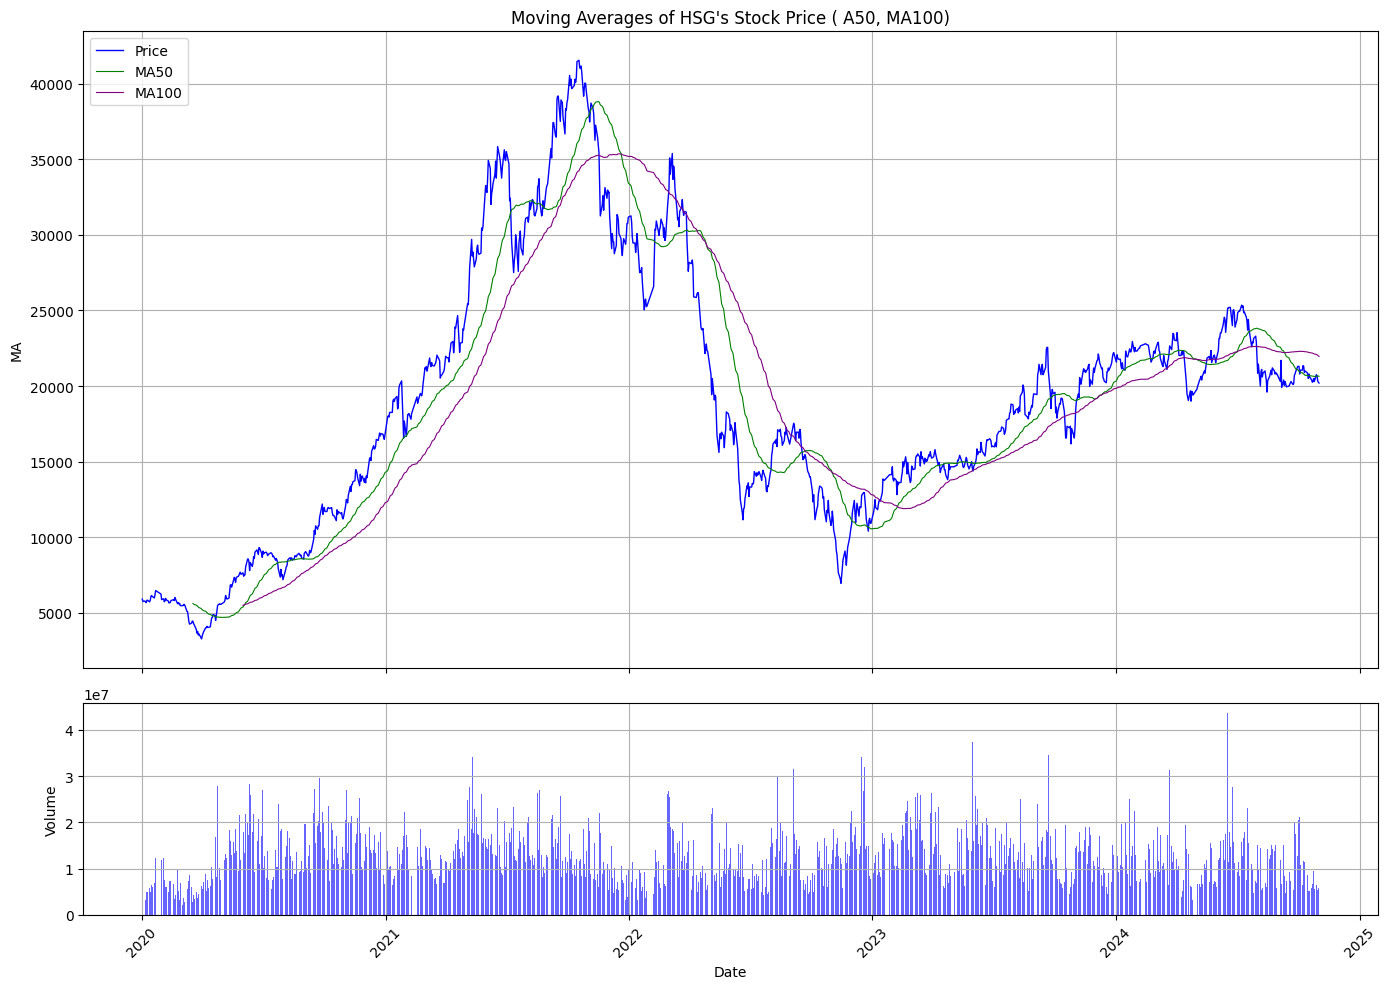

In [45]:
# Calculate moving averages
hsg['MA50'] = hsg['Price'].rolling(window=50).mean()
hsg['MA100'] = hsg['Price'].rolling(window=100).mean()

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Price and moving averages on the first axis (ax1)
ax1.plot(hsg.index, hsg['Price'], label='Price', color='blue', linewidth=1)
ax1.plot(hsg.index, hsg['MA50'], label='MA50', color='green', linewidth=0.8)
ax1.plot(hsg.index, hsg['MA100'], label='MA100', color='purple', linewidth=0.8)

ax1.set_ylabel('MA')
ax1.set_title("Moving Averages of HSG's Stock Price ( A50, MA100)")
ax1.legend(loc='upper left')
ax1.grid(visible=True)

# Volume bars on the second axis (ax2)
ax2.bar(hsg.index, hsg['Vol.'], color='blue', alpha=0.6)
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.grid(visible=True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Stock MACD indicator

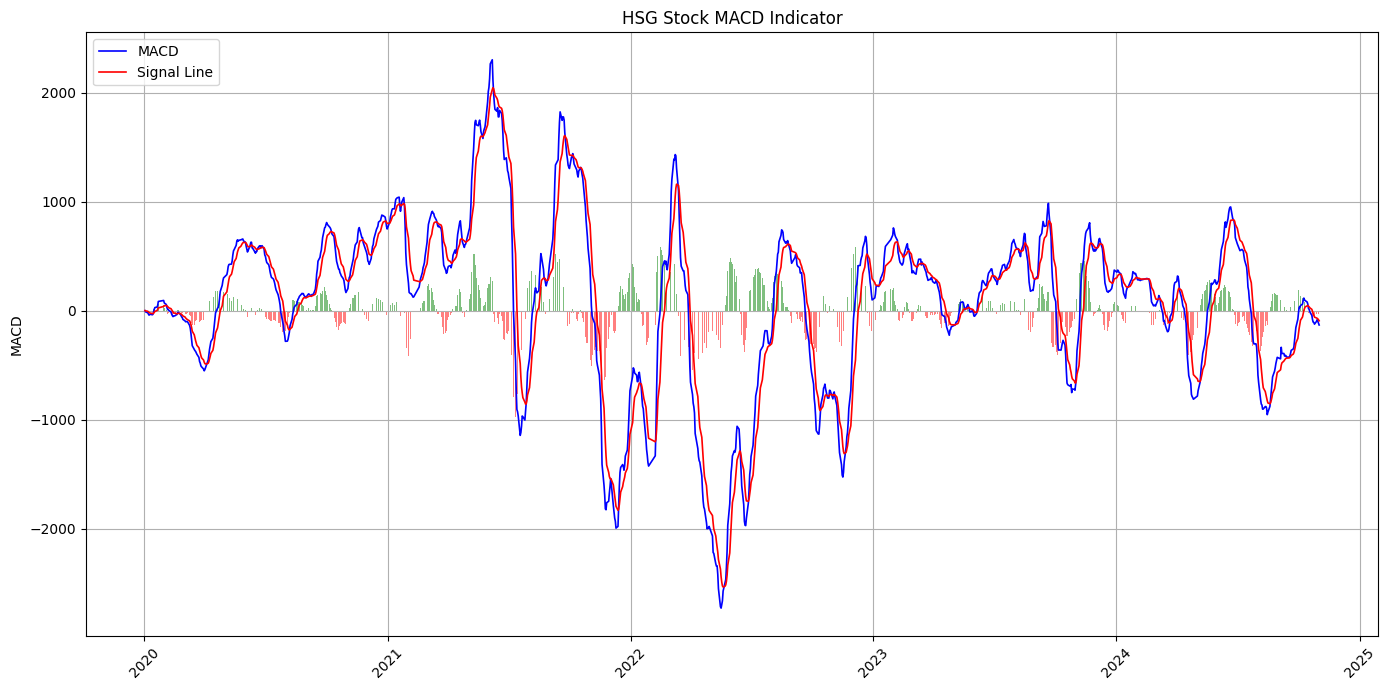

In [ ]:
# Calculate MACD and Signal Line
hsg['EMA12'] = hsg['Price'].ewm(span=12, adjust=False).mean()
hsg['EMA26'] = hsg['Price'].ewm(span=26, adjust=False).mean()
hsg['MACD'] = hsg['EMA12'] - hsg['EMA26']  # MACD line
hsg['Signal'] = hsg['MACD'].ewm(span=9, adjust=False).mean()  # Signal line

# Plotting MACD and Signal Line
plt.figure(figsize=(14, 7))
plt.plot(hsg.index, hsg['MACD'], label='MACD', color='blue', linewidth=1.2)
plt.plot(hsg.index, hsg['Signal'], label='Signal Line', color='red', linewidth=1.2)
plt.bar(hsg.index, hsg['MACD'] - hsg['Signal'], color=(hsg['MACD'] - hsg['Signal']).apply(lambda x: 'green' if x > 0 else 'red'), alpha=0.5)
plt.title("HSG Stock MACD Indicator")
plt.ylabel("MACD")
plt.legend(loc='upper left')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### NKG

In [27]:
# Read the CSV file
nkg = pd.read_csv(r'C:\Documents\PTTK\Project\NKG Historical Data.csv')
nkg = nkg.sort_index(ascending=False)
nkg = nkg.reset_index(drop=True)
nkg['Date'] = pd.to_datetime(nkg['Date'])
nkg.set_index('Date', inplace=True)

# Modify data
# Remove the '%' sign and convert to float
nkg['Change %'] = nkg['Change %'].replace('%', '', regex=True).astype(float)

# Convert the percentage values to decimals (divide by 100)
nkg['Change %'] = nkg['Change %'] / 100

# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    nkg[col] = nkg[col].str.replace(',', '').astype(float)


missing_values = nkg.isnull().sum()
nkg = nkg.dropna()

# Function to convert 'K' values to integers
def convert_volume(value):
    if pd.isnull(value):
        return np.nan  # Handle missing values
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'B' in value:
        return float(value.replace('B', '')) * 1000000000
    else:
        return float(value)

# Apply the function to the "Volume" column
nkg['Vol.'] = nkg['Vol.'].apply(convert_volume)

# Display the cleaned DataFrame
nkg

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-01-02,4849.1,4468.0,4849.1,4468.0,1500000.0,0.0696
2020-01-03,4987.1,4960.8,5065.9,4960.8,1230000.0,0.0285
2020-01-06,5079.1,4987.1,5118.5,4868.8,691530.0,0.0184
2020-01-07,5079.1,5079.1,5111.9,5026.5,1850000.0,0.0000
2020-01-08,5203.9,5079.1,5210.5,4901.7,1590000.0,0.0246
...,...,...,...,...,...,...
2024-10-28,20700.0,20600.0,21100.0,20600.0,3230000.0,0.0122
2024-10-29,20750.0,20850.0,20850.0,20650.0,1710000.0,0.0024
2024-10-30,20650.0,20850.0,20850.0,20550.0,1650000.0,-0.0048


In [28]:
nkg.describe()

,Price,Open,High,Low,Vol.,Change %
count,1207.000000,1207.000000,1207.000000,1207.000000,1.207000e+03,1207.000000
mean,18655.116321,18664.664209,19051.482850,18284.328666,7.665096e+06,0.001785
std,9467.876019,9489.734303,9667.173368,9291.937381,4.778653e+06,0.031644
min,2891.100000,2877.900000,3088.200000,2877.900000,1.661600e+05,-0.070000
25%,11311.850000,11247.250000,11790.700000,10993.450000,4.305000e+06,-0.013850
50%,19350.000000,19350.000000,19800.000000,19050.000000,6.970000e+06,0.001200
75%,24070.850000,24095.850000,24500.000000,23800.000000,1.009500e+07,0.018950
max,44965.800000,45046.300000,45448.500000,44241.900000,2.922000e+07,0.070000


##### Price and volume of NKG

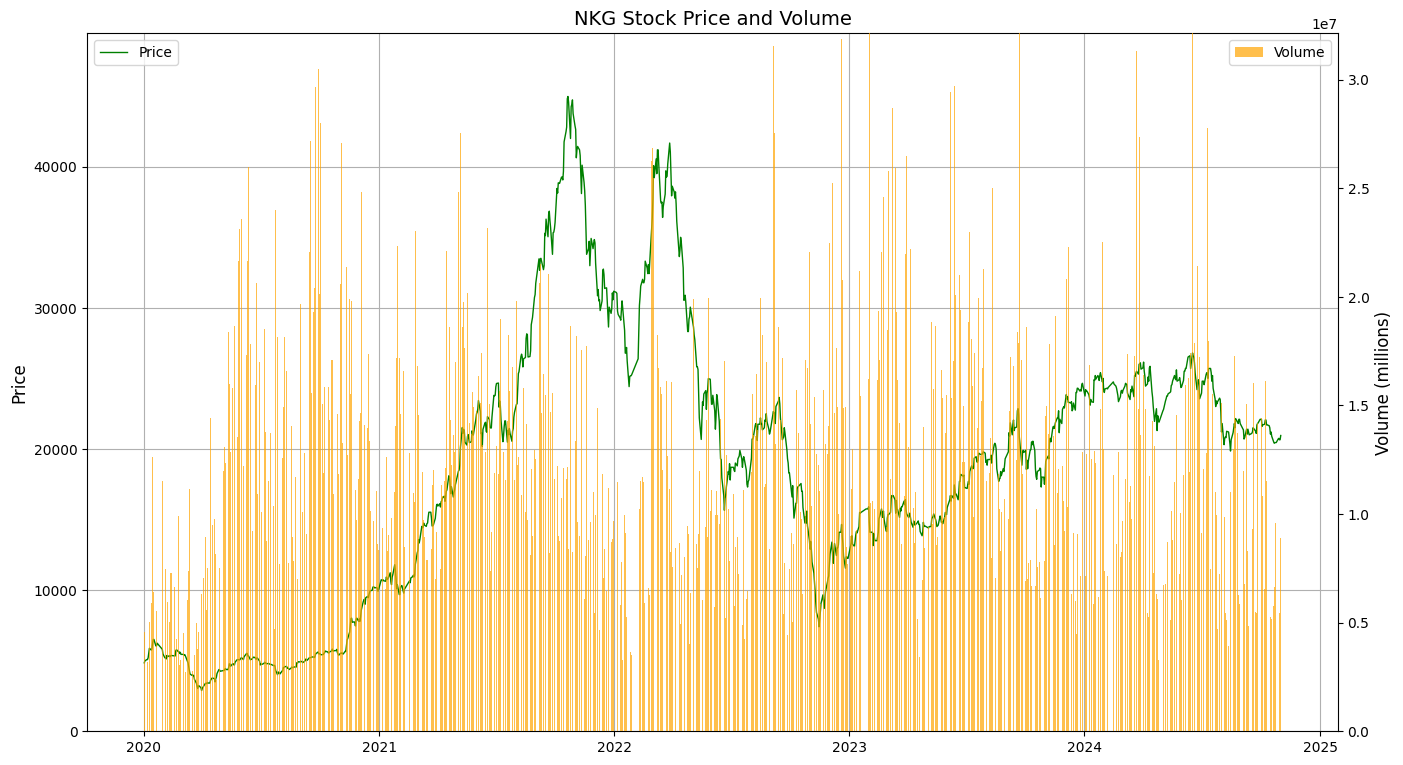

In [ ]:
# Create a figure with two axes, sharing the x-axis
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plotting the price on ax1
ax1.plot(nkg.index, nkg['Price'], color='green', label='Price', linewidth=1)
ax1.set_ylabel('Price', fontsize=12)
ax1.set_ylim(0, nkg['Price'].max() * 1.1)  # Adjust as needed for padding
ax1.set_title("NKG Stock Price and Volume", fontsize=14)
ax1.legend(loc='upper left')
ax1.grid(visible=True)

# Creating a secondary axis for volume, below the price plot
ax2 = ax1.twinx()
ax2.set_frame_on(False)  # Remove the frame around volume plot
ax2.set_position([0.125, 0.05, 0.775, 0.2])  # Adjust position for volume bar
ax2.bar(nkg.index, hsg['Vol.'], color='orange', alpha=0.7, label='Volume')
ax2.set_ylim(0, nkg['Vol.'].max() * 1.1)  # Adjust as needed for padding
ax2.set_ylabel('Volume (millions)', fontsize=12)
ax2.legend(loc='upper right')

# Format x-axis for dates
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### MA for stock price and volume

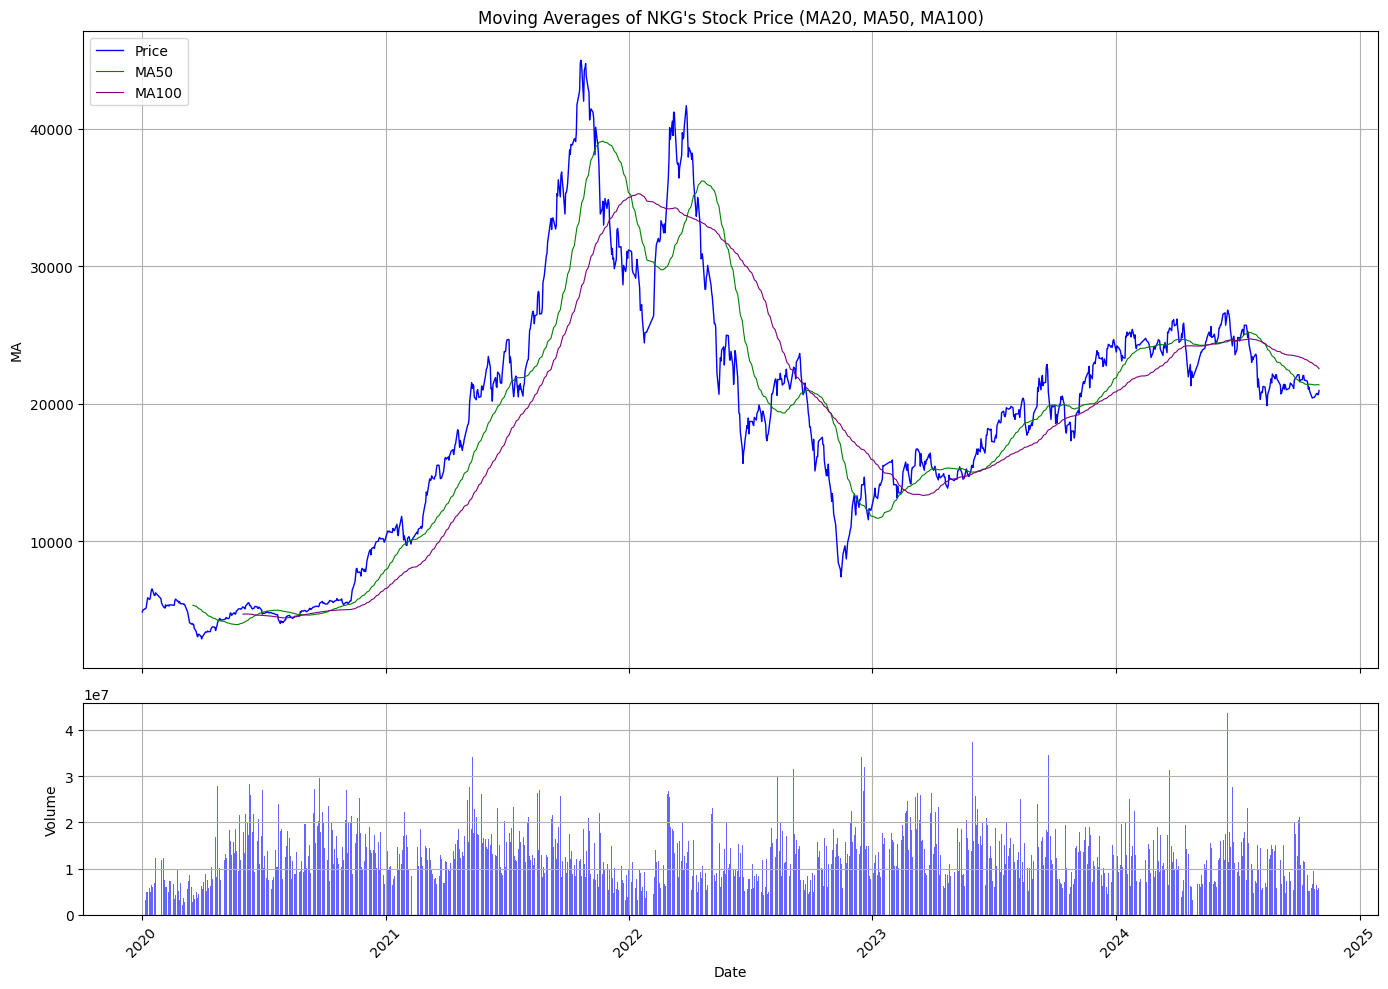

In [30]:
# Calculate moving averages
nkg['MA50'] = nkg['Price'].rolling(window=50).mean()
nkg['MA100'] = nkg['Price'].rolling(window=100).mean()

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Price and moving averages on the first axis (ax1)
ax1.plot(nkg.index, nkg['Price'], label='Price', color='blue', linewidth=1)
ax1.plot(nkg.index, nkg['MA50'], label='MA50', color='green', linewidth=0.8)
ax1.plot(nkg.index, nkg['MA100'], label='MA100', color='purple', linewidth=0.8)

ax1.set_ylabel('MA')
ax1.set_title("Moving Averages of NKG's Stock Price (MA20, MA50, MA100)")
ax1.legend(loc='upper left')
ax1.grid(visible=True)

# Volume bars on the second axis (ax2)
ax2.bar(nkg.index, hsg['Vol.'], color='blue', alpha=0.6)
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.grid(visible=True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### MACD indicator

### Comparation

C:\Users\hien0\AppData\Local\Temp\ipykernel_11652\4250742674.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  hsg_quarterly = hsg['Price'].resample('Q').mean()  # This step should now work if the index is DatetimeIndex


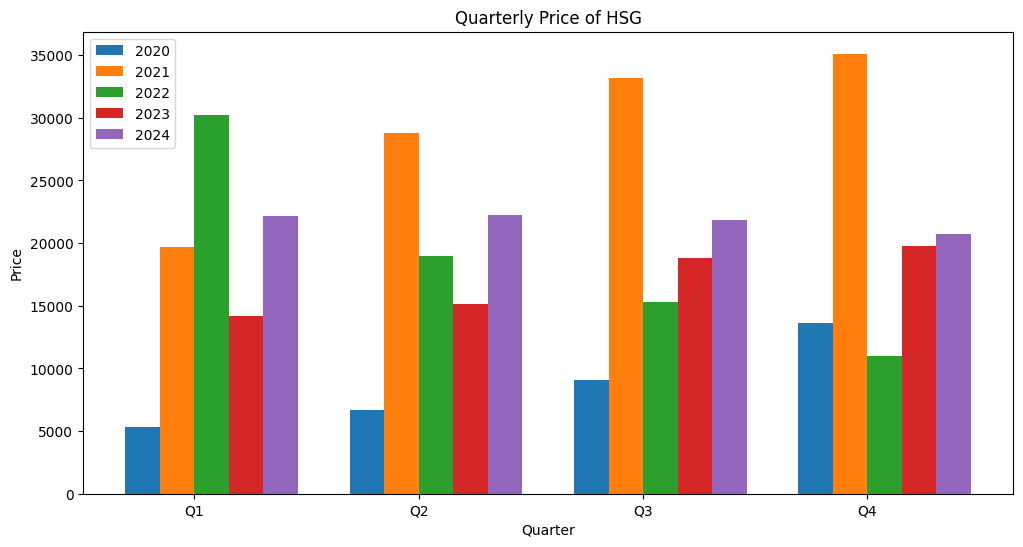

In [31]:
# Step 4: Resample to get quarterly prices (mean price per quarter)
hsg_quarterly = hsg['Price'].resample('Q').mean()  # This step should now work if the index is DatetimeIndex

# Step 5: Create a DataFrame with columns for each year and separate rows for quarters
hsg_quarterly_df = hsg_quarterly.to_frame()
hsg_quarterly_df['Year'] = hsg_quarterly_df.index.year
hsg_quarterly_df['Quarter'] = hsg_quarterly_df.index.quarter

# Step 6: Pivot the data for plotting (Year as columns, Quarter as rows)
hsg_pivot = hsg_quarterly_df.pivot(index='Quarter', columns='Year', values='Price')

# Step 7: Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Define the gap between quarters
quarter_gap = 0.5
bar_width = 0.2
quarters = np.arange(len(hsg_pivot.index)) * (4 * bar_width + quarter_gap)  # Adds space between quarters

# Plot each year's bars with larger spacing between quarters
for i, year in enumerate(hsg_pivot.columns):  # Plot bars for each year
    ax1.bar(quarters + i * bar_width, hsg_pivot[year], width=bar_width, label=str(year))

# Labels, ticks, and legends
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Price')
ax1.set_xticks(quarters + bar_width * 1.5)  # Center ticks between bars for each quarter
ax1.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
ax1.legend(loc='upper left')
plt.title('Quarterly Price of HSG')

plt.show()

C:\Users\hien0\AppData\Local\Temp\ipykernel_11652\305967231.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  nkg_quarterly = nkg['Price'].resample('Q').mean()  # This step should now work if the index is DatetimeIndex


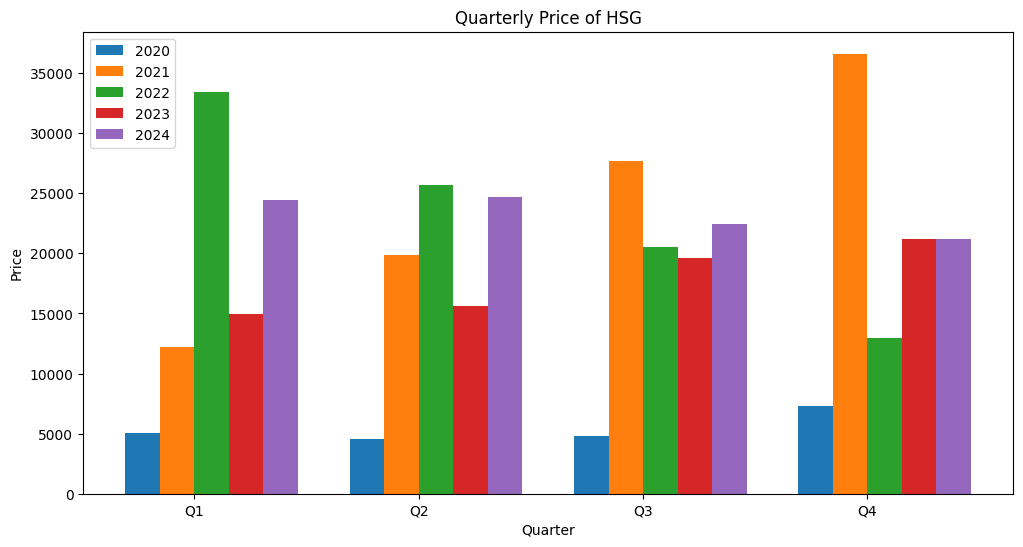

In [32]:
# Resample to get quarterly prices (mean price per quarter)
nkg_quarterly = nkg['Price'].resample('Q').mean()  # This step should now work if the index is DatetimeIndex

# Create a DataFrame with columns for each year and separate rows for quarters
nkg_quarterly_df = nkg_quarterly.to_frame()
nkg_quarterly_df['Year'] = nkg_quarterly_df.index.year
nkg_quarterly_df['Quarter'] = nkg_quarterly_df.index.quarter

# Pivot the data for plotting (Year as columns, Quarter as rows)
nkg_pivot = nkg_quarterly_df.pivot(index='Quarter', columns='Year', values='Price')

#  Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Define the gap between quarters
quarter_gap = 0.5
bar_width = 0.2
quarters = np.arange(len(nkg_pivot.index)) * (4 * bar_width + quarter_gap)  # Adds space between quarters

# Plot each year's bars with larger spacing between quarters
for i, year in enumerate(hsg_pivot.columns):  # Plot bars for each year
    ax1.bar(quarters + i * bar_width, nkg_pivot[year], width=bar_width, label=str(year))

# Labels, ticks, and legends
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Price')
ax1.set_xticks(quarters + bar_width * 1.5)  # Center ticks between bars for each quarter
ax1.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
ax1.legend(loc='upper left')
plt.title('Quarterly Price of HSG')

plt.show()

#### Histogram Price

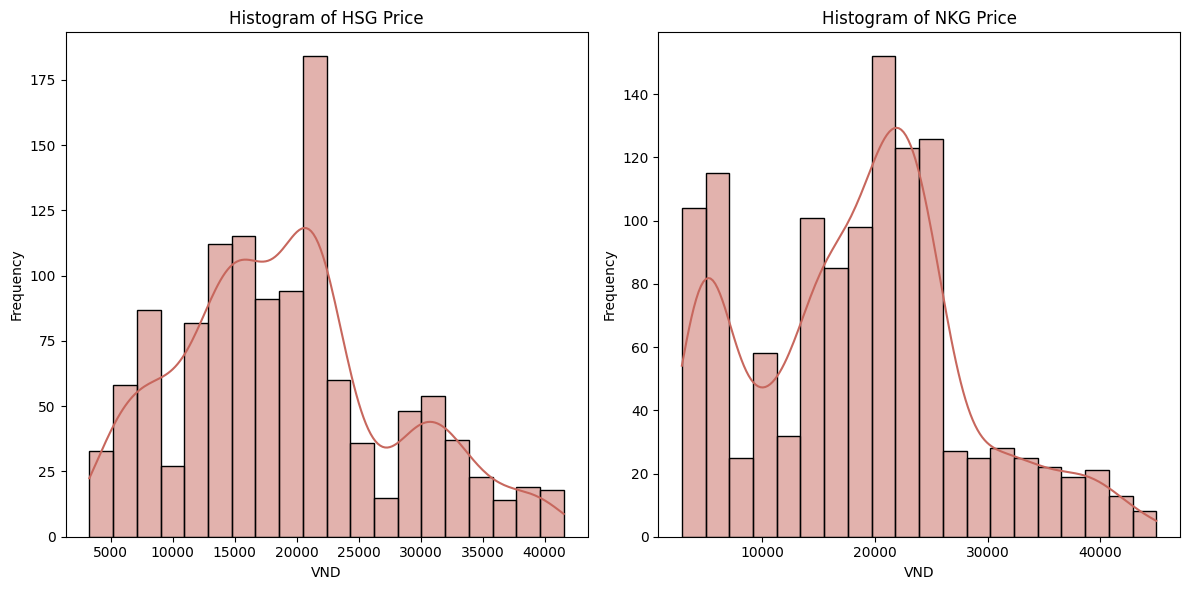

In [33]:
# Create subplots (2 rows, 1 column)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# HSG Histogram
sns.histplot(hsg['Price'], color='#c7675d', bins=20, kde=True, ax=axs[0])
axs[0].set_title('Histogram of HSG Price')
axs[0].set_xlabel('VND')
axs[0].set_ylabel('Frequency')

# NKG Histogram
sns.histplot(nkg['Price'], color='#c7675d', bins=20, kde=True, ax=axs[1])
axs[1].set_title('Histogram of NKG Price')
axs[1].set_xlabel('VND')
axs[1].set_ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

#### Box plot price

C:\Users\hien0\AppData\Local\Temp\ipykernel_11652\950752331.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["HSG Price", "NKG Price"], patch_artist=True)


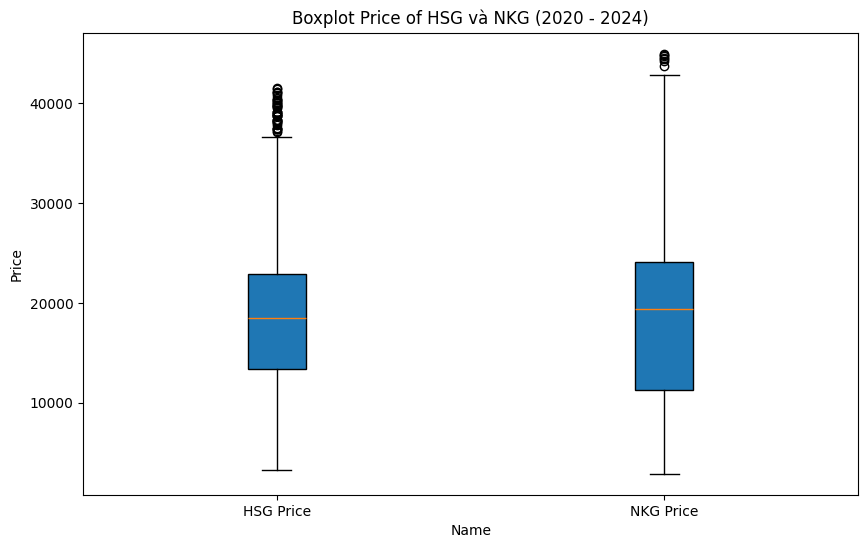

In [34]:
data = [hsg['Price'], nkg['Price']]

plt.figure(figsize=(10, 6))

plt.boxplot(data, labels=["HSG Price", "NKG Price"], patch_artist=True)

plt.title("Boxplot Price of HSG và NKG (2020 - 2024)")
plt.xlabel("Name")
plt.ylabel("Price")

plt.show()

#### Change

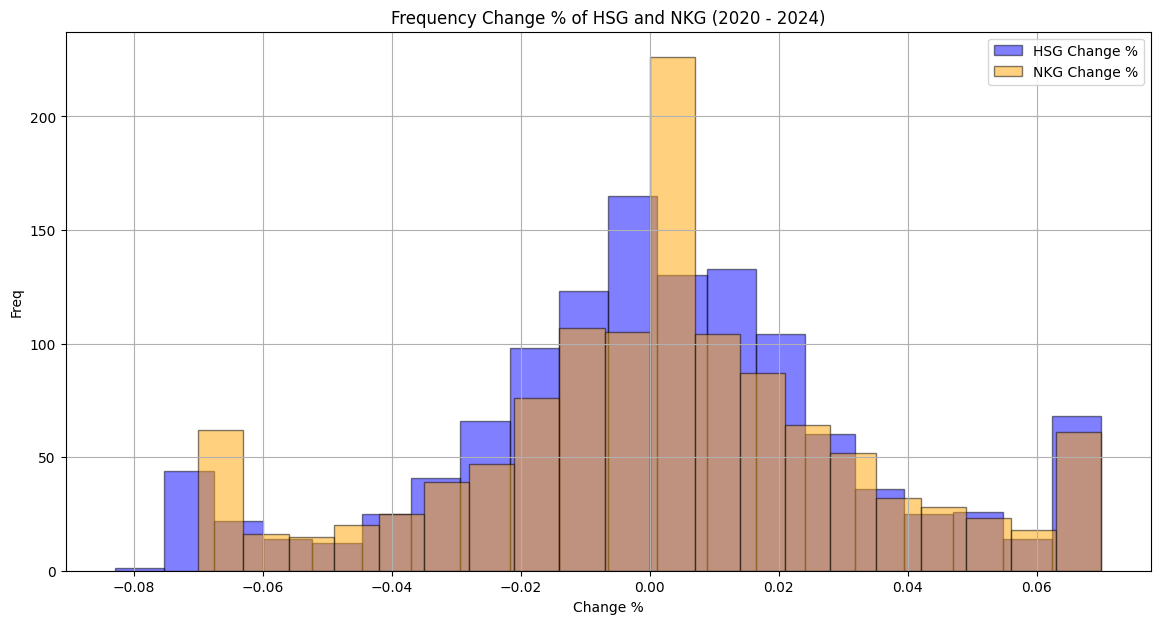

In [35]:
plt.figure(figsize=(14, 7))
plt.grid(True)

plt.hist(hsg['Change %'], bins=20, alpha=0.5, label="HSG Change %", color='blue', edgecolor='black')

plt.hist(nkg['Change %'], bins=20, alpha=0.5, label="NKG Change %", color='orange', edgecolor='black')

plt.title("Frequency Change % of HSG and NKG (2020 - 2024)")
plt.xlabel("Change %")
plt.ylabel("Freq")

plt.legend()
plt.show()


C:\Users\hien0\AppData\Local\Temp\ipykernel_11652\3884127229.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  nkg_quarterly = nkg['Change %'].resample('Q').sum()  # This step should now work if the index is DatetimeIndex
C:\Users\hien0\AppData\Local\Temp\ipykernel_11652\3884127229.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  hsg_quarterly = hsg['Change %'].resample('Q').sum()  # This step should now work if the index is DatetimeIndex


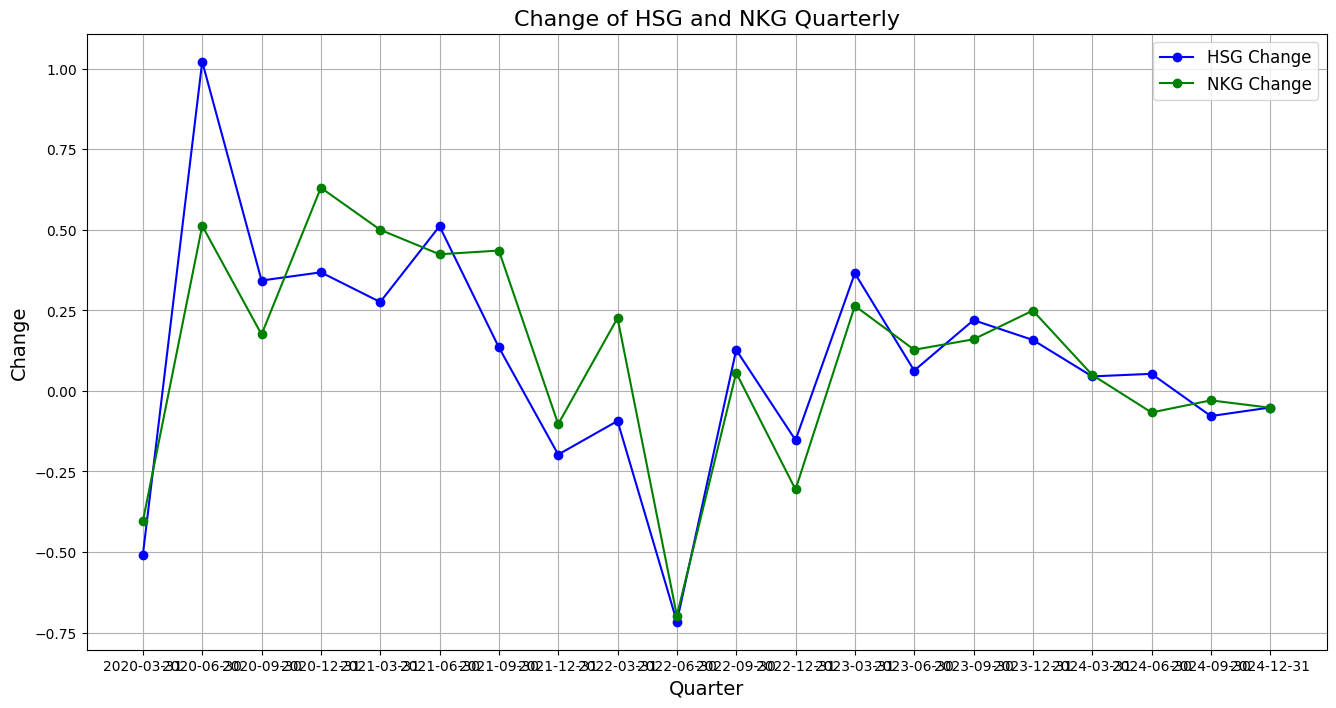

In [36]:
nkg_quarterly = nkg['Change %'].resample('Q').sum()  # This step should now work if the index is DatetimeIndex
hsg_quarterly = hsg['Change %'].resample('Q').sum()  # This step should now work if the index is DatetimeIndex

# Figure volume
plt.figure(figsize=(16, 8))  
plt.plot(hsg_quarterly.index.astype(str), hsg_quarterly, label='HSG Change', color='blue', marker='o')
plt.plot(nkg_quarterly.index.astype(str), nkg_quarterly, label='NKG Change', color='green', marker='o')
plt.title('Change of HSG and NKG Quarterly', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Change', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)

In [37]:
print(hsg.index)

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-10-21', '2024-10-22', '2024-10-23', '2024-10-24',
               '2024-10-25', '2024-10-28', '2024-10-29', '2024-10-30',
               '2024-10-31', '2024-11-01'],
              dtype='datetime64[ns]', name='Date', length=1207, freq=None)


#### Volume

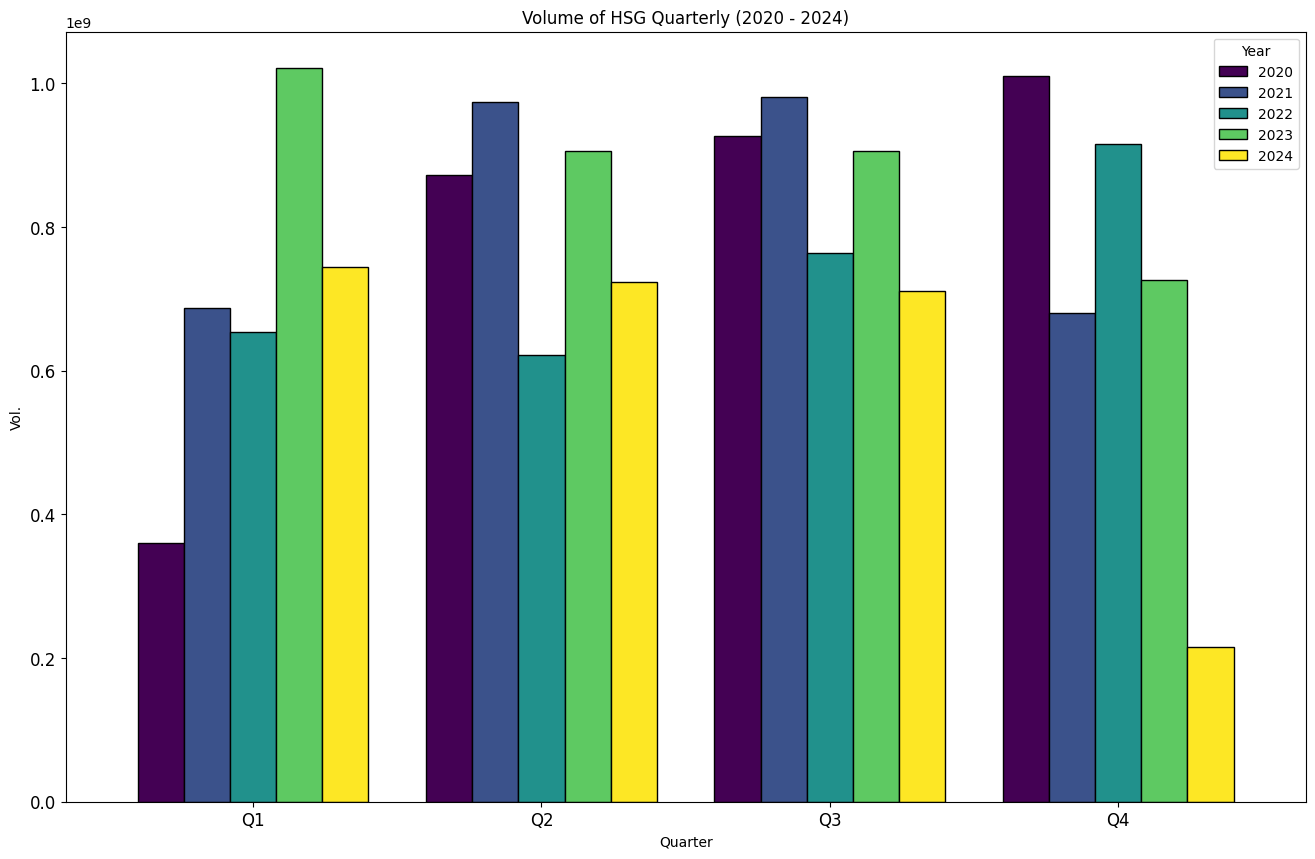

In [38]:
# Step 1: Filter data for 2020-2024 using the DatetimeIndex
hsg_filtered = hsg[(hsg.index.year >= 2020) & (hsg.index.year <= 2024)].copy()

# Step 2: Extract year and quarter from the index
hsg_filtered['Year'] = hsg_filtered.index.year
hsg_filtered['Quarter'] = hsg_filtered.index.quarter

# Step 3: Group by Quarter and Year and sum the volume
quarterly_volume = hsg_filtered.groupby(['Quarter', 'Year'])['Vol.'].sum().unstack()

# Step 4: Plotting
ax = quarterly_volume.plot(kind='bar', figsize=(16, 10), width=0.8, colormap='viridis', edgecolor='black')

# Additional plotting details
ax.set_title("Volume of HSG Quarterly (2020 - 2024)")
ax.set_xlabel("Quarter")
ax.set_ylabel("Vol.")
ax.set_xticks(range(len(quarterly_volume.index)))  # One tick per quarter
ax.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'], rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Year")

plt.show()


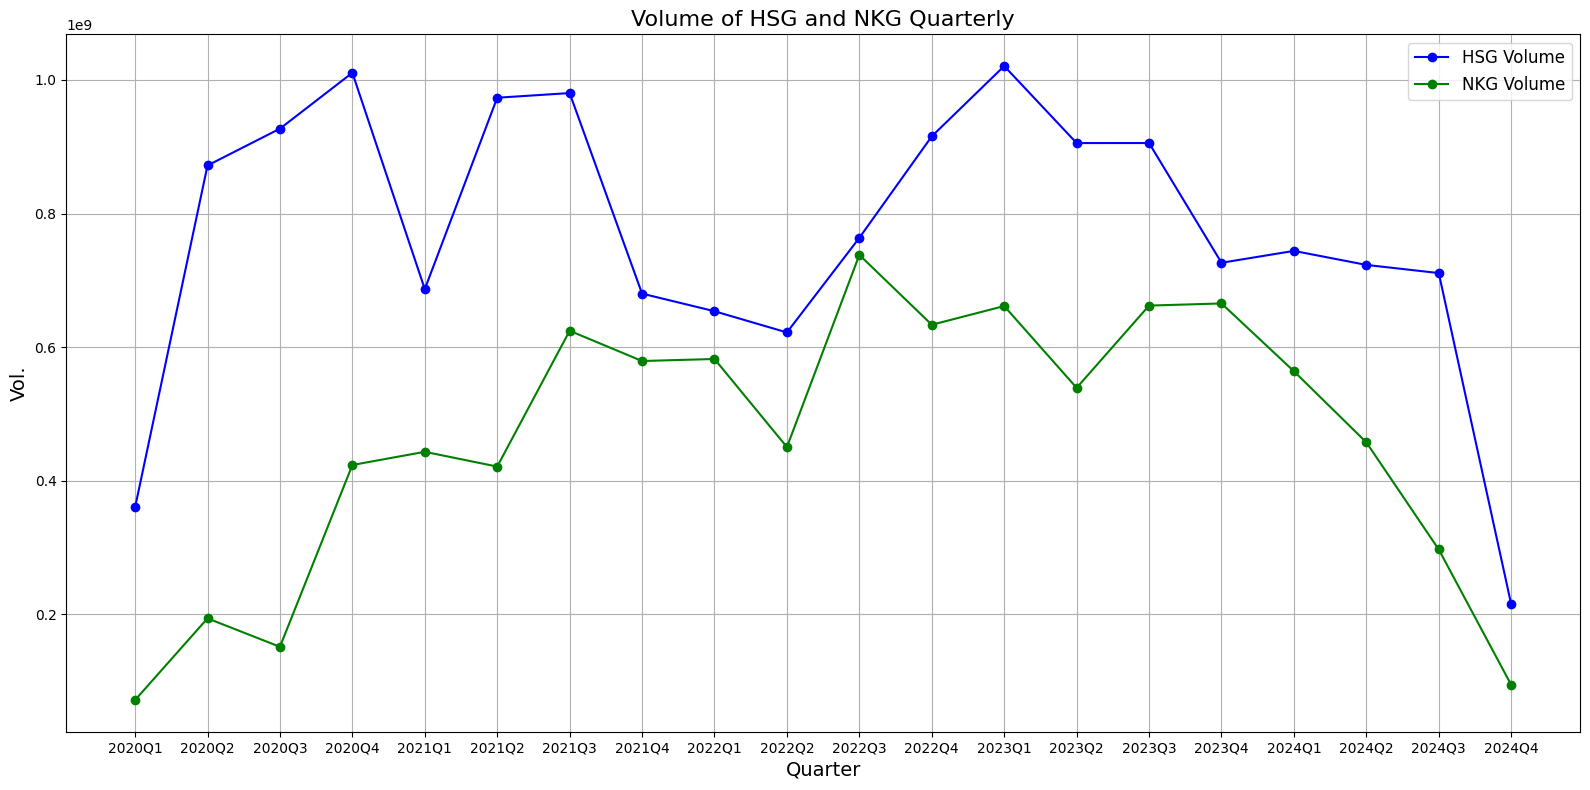

In [39]:

# Use the existing DatetimeIndex to set the 'Quarter' as a PeriodIndex for grouping
hsg['Quarter'] = hsg.index.to_period('Q')
nkg['Quarter'] = nkg.index.to_period('Q')

# Compute the total volume for each quarter
hsg_quarterly_vol = hsg.groupby('Quarter')['Vol.'].sum()
nkg_quarterly_vol = nkg.groupby('Quarter')['Vol.'].sum()

# Plot the quarterly volumes for HSG and NKG
plt.figure(figsize=(16, 8))
plt.plot(hsg_quarterly_vol.index.astype(str), hsg_quarterly_vol, label='HSG Volume', color='blue', marker='o')
plt.plot(nkg_quarterly_vol.index.astype(str), nkg_quarterly_vol, label='NKG Volume', color='green', marker='o')

# Adding titles and labels
plt.title('Volume of HSG and NKG Quarterly', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Vol.', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)

# Show plot with layout adjustments
plt.tight_layout()
plt.show()


#### Volatility

In [40]:
hsg_volatility = hsg['Change %'].std() * (252 ** 0.5)
nkg_volatility = nkg['Change %'].std() * (252 ** 0.5)
print(f"HSG Volatility: {hsg_volatility}")
print(f"NKG Volatility: {nkg_volatility}")

HSG Volatility: 0.497671166255534
NKG Volatility: 0.5023299056769686
